In [23]:
import rosbag
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tf
import seaborn as sns

In [24]:
bag = rosbag.Bag('/home/uware/rosbags/d_l_all_2022-03-01-10-35-52.bag')

# create variables
target = 'is_detected'

# in meters per second ( walking speed is about 1.4m/s )
# velocity = 1.4

In [25]:
topic = '/tag_detections'

rows = []

for topic, msg, t in bag.read_messages(topics=topic):
    time = t

    # we only care if there is or there isn't a detection in message published and consider there is only one tag in the frame
    is_detected = len(msg.detections)

    # detection positions are only for information, it is not being used for anything
    if is_detected>0:
        position = msg.detections[0].pose.pose.pose.position
        x,y,z = position.x, position.z, position.z
        row={'time': time.to_sec(), target: is_detected, 'x': x, 'y': y, 'z': z}

    else:
        row={'time': time.to_sec(), target: is_detected, 'x': None, 'y': None, 'z': None}
    rows.append(row)

df = pd.DataFrame.from_records(rows)

In [26]:
# calculate relative time in seconds instead of absolute time
df['relative_time'] =  df.loc[0:, 'time'] - df.at[0, 'time']
df = df.drop(columns=['time'])
df.groupby(target).head(2)

,is_detected,x,y,z,relative_time
0,0,NaN,NaN,NaN,0.000000
1,0,NaN,NaN,NaN,0.321184
35,1,-0.621070,1.150682,1.150682,7.187892
36,1,-0.615981,1.142857,1.142857,7.382724


In [27]:
# ratio of detected to not
ratios = df.is_detected.value_counts(normalize=True)*100
ratios

0    51.800379
1    48.199621
Name: is_detected, dtype: float64

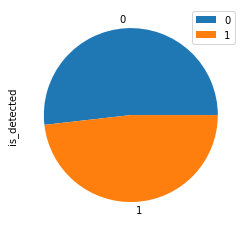

In [28]:
ratios.plot.pie()
plt.legend()

In [29]:
df.head(5)

,is_detected,x,y,z,relative_time
0,0,NaN,NaN,NaN,0.000000
1,0,NaN,NaN,NaN,0.321184
2,0,NaN,NaN,NaN,0.573977
3,0,NaN,NaN,NaN,0.827620
4,0,NaN,NaN,NaN,1.043618


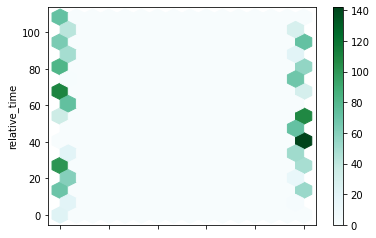

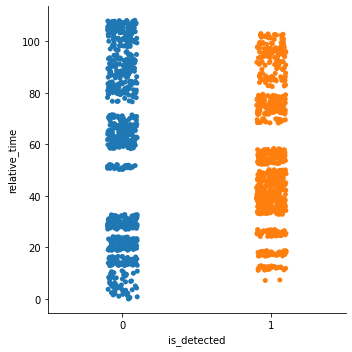

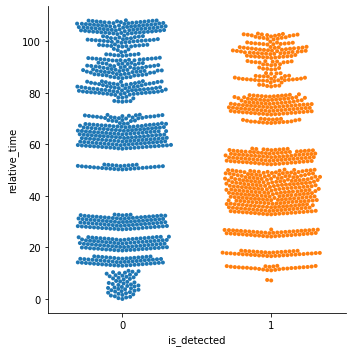

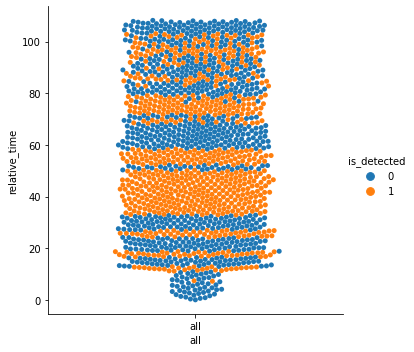

In [30]:
df.plot.hexbin(x=target, y="relative_time", gridsize=15)
sns.catplot(x=target, y='relative_time', data=df)
sns.catplot(x=target, y='relative_time', data=df, kind="swarm", s=4) # s=size of markers causes warnings when >4

# creating a dummy column for plotting both classes together
df.loc[:,'all'] = 'all'
sns.catplot(x='all', y='relative_time', data=df, hue=target, kind="swarm")